In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0,10.0)

### Plot Function
This will just plot our data

In [3]:
def plot(X,Y,slope=0,y_intercept=0):
    # If no slope and y_intercept is passed then plot scatter only
    if(slope == 0.0 and y_intercept == 0.0):
        fig, ax = plt.subplots(figsize=(10, 5))
        # Plot Scatter points
        ax.scatter(X,Y,color='blue',edgecolors='black', label='Scatter Plot')
        # For better graph
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
        ax.set(xlabel='SAT Score', ylabel='GPA', title='GPA Data')
        ax.set_facecolor('#f0f0f0')
        ax.legend()
    else:
        fig, ax = plt.subplots(figsize=(10, 5))
        max_x = np.max(X)
        min_x = np.min(X)
        
        x = np.linspace(min_x,max_x,(max_x*100))
        y = (slope*x) + y_intercept
        
        #Plot line
        ax.plot(x,y,color='green',label = 'Regression Line')
        # Plot Scatter points
        ax.scatter(X,Y,color='blue',edgecolors='black', label='Scatter Plot')
        # Plot Means
        plt.axvline(x=np.mean(X),linestyle='--',label="X mean",color='purple')
        plt.axhline(y=np.mean(Y),linestyle='--',label="Y mean")
        
        # For better graph
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
        ax.set(xlabel='SAT Score', ylabel='GPA', title='GPA Data')
        ax.set_facecolor('#f0f0f0')
        ax.legend()

### Load Data Set

In [4]:
data = pd.read_csv('gpa_data.csv')

print('Head():\n',data.head(),'\n')
print('Tail():\n',data.tail(),'\n')
print('Data Shape: ',data.shape)

Head():
     SAT   GPA
0  1714  2.40
1  1664  2.52
2  1760  2.54
3  1685  2.74
4  1693  2.83 

Tail():
      SAT   GPA
79  1936  3.71
80  1810  3.71
81  1987  3.73
82  1962  3.76
83  2050  3.81 

Data Shape:  (84, 2)


## Seperate Data

In [5]:
X = data['SAT'].values
X = X.reshape((len(X),1)) #(n,)->(n,1)

Y = data['GPA'].values
Y = Y.reshape((len(Y),1)) #(n,)->(n,1)

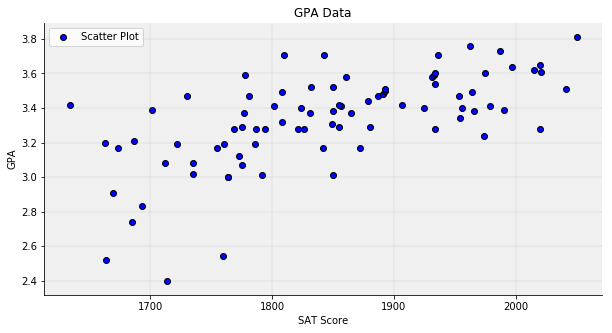

In [5]:
plot(X,Y)

### Method 1: Linear Regression Algorithm
returns weight vector

In [6]:
def linearRegression_methodOne(X,Y):
    # Add ones col to feature matrix to get y-intercept
    n,m = X.shape
    oneCol = np.ones((n,1))
    X_with_Ones = np.hstack((oneCol,X))
    
    # find x dagger 
    x_dagger = np.dot((np.linalg.inv(np.dot(X_with_Ones.T,X_with_Ones))), X_with_Ones.T)
    w = np.dot(x_dagger,Y)
    
    return w[0,0],w[1,0]

In [7]:
y_intercept,slope = linearRegression_methodOne(X,Y)

print("y_intercept: ", y_intercept)
print("slope:" , slope)

y_intercept:  0.27504029966059995
slope: 0.0016556880500927336


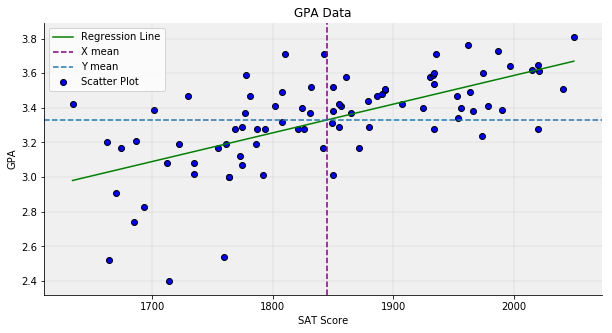

In [8]:
plot(X,Y,slope,y_intercept)

### Method 2: Linear Regression Algorithm
returns weight vector

In [9]:
def linearRegression_methodTwo(X,Y):
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    xy_mean = np.dot(np.transpose(X),Y)/len(X)
    x_powTwo_mean = np.dot(np.transpose(X),X)/len(X)
    
    w = (xy_mean - (x_mean*y_mean))/(x_powTwo_mean - (x_mean*x_mean))
    b = y_mean - (w*x_mean)

    return b[0,0],w[0,0]

In [10]:
y_intercept,slope = linearRegression_methodTwo(X,Y)
print("y_intercept: ", y_intercept)
print("slope:" , slope)

y_intercept:  0.27504029966044463
slope: 0.0016556880500927249


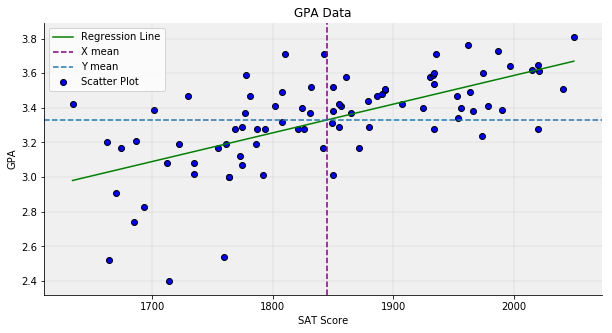

In [11]:
plot(X,Y,slope,y_intercept)